In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

import nltk
from wordcloud import WordCloud

In [2]:
#import imdb data

imdb_data = pd.read_csv("imdb_sentiment.csv")
imdb_data

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nismai01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Text cleaning techniques:
1. Normalizing text -  case normaization
2. Tokenize
3. Removing stop words and punctuations
4. Stemming and lemmetization

Other steps include:
1. dealing with numbers
2. spell check

In [4]:
# number of characters per review
imdb_data.review.str.len()

0       87
1       99
2      188
3       44
4      108
      ... 
743     63
744     92
745     32
746     20
747     75
Name: review, Length: 748, dtype: int64

In [5]:
#case normalization :convert to lower case
imdb_data.review.str.lower()

0      a very, very, very slow-moving, aimless movie ...
1      not sure who was more lost - the flat characte...
2      attempting artiness with black & white and cle...
3           very little music or anything to speak of.  
4      the best scene in the movie was when gerardo i...
                             ...                        
743    i just got bored watching jessice lange take h...
744    unfortunately, any virtue in this film's produ...
745                     in a word, it is embarrassing.  
746                                 exceptionally bad!  
747    all in all its an insult to one's intelligence...
Name: review, Length: 748, dtype: object

In [6]:
imdb_data['review']

0      A very, very, very slow-moving, aimless movie ...
1      Not sure who was more lost - the flat characte...
2      Attempting artiness with black & white and cle...
3           Very little music or anything to speak of.  
4      The best scene in the movie was when Gerardo i...
                             ...                        
743    I just got bored watching Jessice Lange take h...
744    Unfortunately, any virtue in this film's produ...
745                     In a word, it is embarrassing.  
746                                 Exceptionally bad!  
747    All in all its an insult to one's intelligence...
Name: review, Length: 748, dtype: object

In [7]:
from nltk.tokenize import word_tokenize
imdb_data['toke'] = imdb_data.review.apply(word_tokenize)

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nismai01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
reviews_combined = " - ".join(imdb_data.review)

In [10]:
#Total words in reviews
len(reviews_combined)

85259

In [11]:
word_cloud = WordCloud().generate_from_text(reviews_combined)

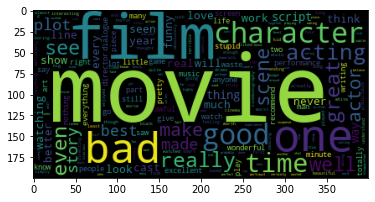

In [12]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [13]:
from string import punctuation
from nltk.corpus import stopwords

stop_nltk = stopwords.words("english")
stop_updated = stop_nltk + list(punctuation) + ["..."] +['a','is','to','movie','they','are', 'it','this','film']

# review_updated= [word for word in imdb_data['toke'] if word not in stop_updated and len(word) > 2]

tokenized_review = word_tokenize(reviews_combined.lower())

In [14]:
# reviews_combined = [" - ".join(sentence) for sentence in review_updated]
# reviews_combined

In [15]:
reviews_updated = [word for word in tokenized_review if word not in stop_updated and len(word) > 2]
reviews_updated

['slow-moving',
 'aimless',
 'distressed',
 'drifting',
 'young',
 'man',
 'sure',
 'lost',
 'flat',
 'characters',
 'audience',
 'nearly',
 'half',
 'walked',
 'attempting',
 'artiness',
 'black',
 'white',
 'clever',
 'camera',
 'angles',
 'disappointed',
 'became',
 'even',
 'ridiculous',
 'acting',
 'poor',
 'plot',
 'lines',
 'almost',
 'non-existent',
 'little',
 'music',
 'anything',
 'speak',
 'best',
 'scene',
 'gerardo',
 'trying',
 'find',
 'song',
 'keeps',
 'running',
 'head',
 'rest',
 'lacks',
 'art',
 'charm',
 'meaning',
 'emptiness',
 'works',
 'guess',
 'empty',
 'wasted',
 'two',
 'hours',
 'saw',
 'today',
 'thought',
 'good',
 'effort',
 'good',
 'messages',
 'kids',
 'bit',
 'predictable',
 'loved',
 'casting',
 'jimmy',
 'buffet',
 'science',
 'teacher',
 'baby',
 'owls',
 'adorable',
 'showed',
 'lot',
 'florida',
 'best',
 'made',
 'look',
 'appealing',
 'songs',
 'best',
 'muppets',
 'hilarious',
 'cool',
 'right',
 'case',
 'delivers',
 'everything',
 'almos

In [16]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [17]:
stemmer_p = PorterStemmer()
reviews_stemmed = [ stemmer_p.stem(word) for word in reviews_updated]

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nismai01\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
combined_stemmed=" ".join(reviews_stemmed)

In [20]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [21]:
[lemm.lemmatize(word) for word in word_tokenize(combined_stemmed) ]

['slow-mov',
 'aimless',
 'distress',
 'drift',
 'young',
 'man',
 'sure',
 'lost',
 'flat',
 'charact',
 'audienc',
 'nearli',
 'half',
 'walk',
 'attempt',
 'arti',
 'black',
 'white',
 'clever',
 'camera',
 'angl',
 'disappoint',
 'becam',
 'even',
 'ridicul',
 'act',
 'poor',
 'plot',
 'line',
 'almost',
 'non-exist',
 'littl',
 'music',
 'anyth',
 'speak',
 'best',
 'scene',
 'gerardo',
 'tri',
 'find',
 'song',
 'keep',
 'run',
 'head',
 'rest',
 'lack',
 'art',
 'charm',
 'mean',
 'empti',
 'work',
 'guess',
 'empti',
 'wast',
 'two',
 'hour',
 'saw',
 'today',
 'thought',
 'good',
 'effort',
 'good',
 'messag',
 'kid',
 'bit',
 'predict',
 'love',
 'cast',
 'jimmi',
 'buffet',
 'scienc',
 'teacher',
 'babi',
 'owl',
 'ador',
 'show',
 'lot',
 'florida',
 'best',
 'made',
 'look',
 'appeal',
 'song',
 'best',
 'muppet',
 'hilari',
 'cool',
 'right',
 'case',
 'deliv',
 'everyth',
 'almost',
 'right',
 'face',
 'averag',
 'act',
 'main',
 'person',
 'low',
 'budget',
 'clearli',


## Word Cloud after cleanup

In [22]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(combined_stemmed)

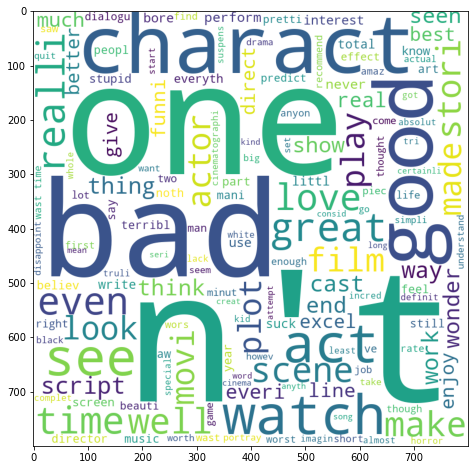

In [23]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## Bar graph of top 25 unigrams

In [24]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1
print(fdist)

{'A': 16, 'very,': 4, 'very': 54, 'slow-moving,': 1, 'aimless': 1, 'movie': 132, 'about': 45, 'a': 411, 'distressed,': 1, 'drifting': 1, 'young': 3, 'man.': 1, '': 1752, '-': 778, 'Not': 9, 'sure': 2, 'who': 34, 'was': 178, 'more': 29, 'lost': 4, 'the': 654, 'flat': 2, 'characters': 25, 'or': 37, 'audience,': 1, 'nearly': 1, 'half': 6, 'of': 368, 'whom': 2, 'walked': 2, 'out.': 5, 'Attempting': 1, 'artiness': 1, 'with': 86, 'black': 6, '&': 9, 'white': 7, 'and': 410, 'clever': 3, 'camera': 6, 'angles,': 1, 'disappointed': 4, 'became': 2, 'even': 32, 'ridiculous': 2, 'as': 90, 'acting': 33, 'poor': 6, 'plot': 20, 'lines': 5, 'almost': 7, 'non-existent.': 1, 'Very': 5, 'little': 16, 'music': 9, 'anything': 7, 'to': 244, 'speak': 2, 'of.': 1, 'The': 141, 'best': 18, 'scene': 10, 'in': 191, 'when': 23, 'Gerardo': 1, 'is': 321, 'trying': 4, 'find': 10, 'song': 4, 'that': 145, 'keeps': 2, 'running': 2, 'through': 9, 'his': 34, 'head.': 1, 'rest': 4, 'lacks': 6, 'art,': 2, 'charm,': 1, 'meani

In [25]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)
print(df_dist)

              words  freq
0                 A    16
1             very,     4
2              very    54
3      slow-moving,     1
4           aimless     1
...             ...   ...
4323    regrettable     1
4324          word,     1
4325  embarrassing.     1
4326  Exceptionally     1
4327          one's     1

[4328 rows x 2 columns]


<AxesSubplot:xlabel='words'>

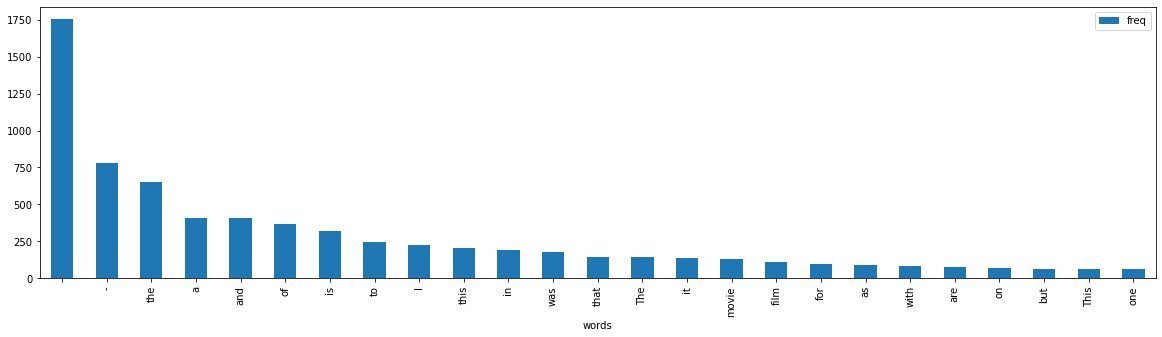

In [26]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

## Bar graph of top 25 bigrams

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features = 1500)

In [60]:
# Define function that takes in a raw string, returns a clean string
# - Tokenize, lower case, remove stop words, stem, stitch back to string
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_p.stem(term) for term in tokens if term not in stop_updated and len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [29]:
imdb_data.review

0      A very, very, very slow-moving, aimless movie ...
1      Not sure who was more lost - the flat characte...
2      Attempting artiness with black & white and cle...
3           Very little music or anything to speak of.  
4      The best scene in the movie was when Gerardo i...
                             ...                        
743    I just got bored watching Jessice Lange take h...
744    Unfortunately, any virtue in this film's produ...
745                     In a word, it is embarrassing.  
746                                 Exceptionally bad!  
747    All in all its an insult to one's intelligence...
Name: review, Length: 748, dtype: object

In [30]:
imdb_data['clean_review'] = imdb_data.review.apply(clean_txt)

In [67]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features = 1500)
X_bigram = bigram_count_vectorizer.fit_transform(imdb_data['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [70]:
X_bigram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<AxesSubplot:>

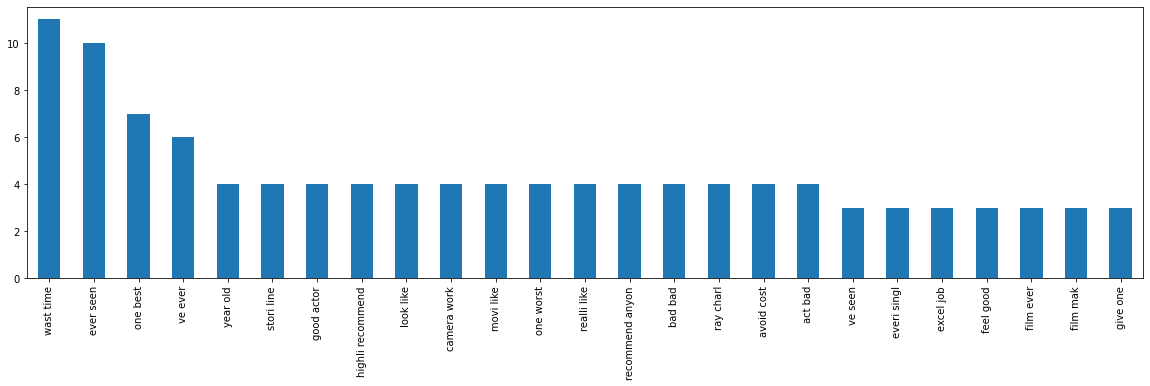

In [68]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

## Bar graph of top 25 trigrams

In [76]:
import nltk
from nltk.util import ngrams
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
 
data = 'A class is a blueprint for the object.'
extract_ngrams(data,3)


#plot trigram plots
trigrams = [extract_ngrams(sentence,3) for sentence in imdb_data['clean_review']]

# create a trigram count vectorizer object
trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features = 1500)
trigram = trigram_count_vectorizer.fit_transform(imdb_data['clean_review'])

In [78]:
# Creating a DTM
DTM_trigram = pd.DataFrame(trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

<AxesSubplot:>

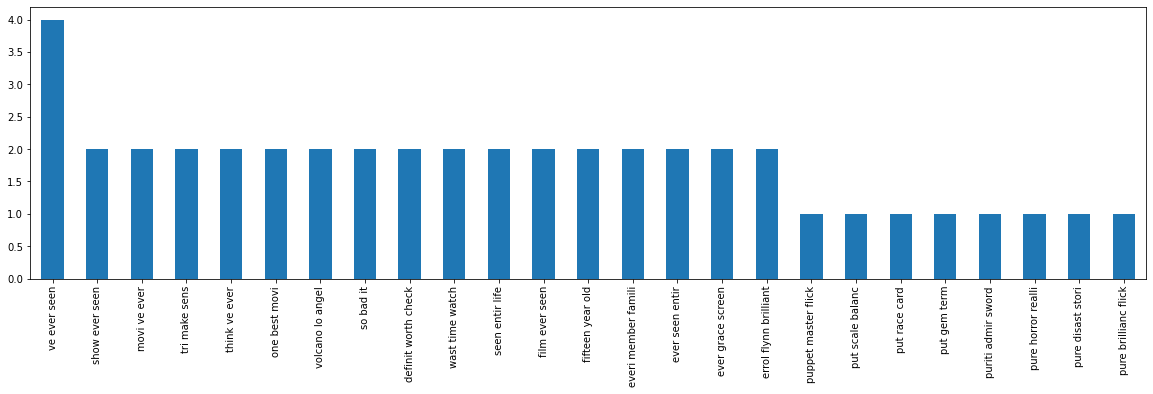

In [79]:
DTM_trigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

## Sentiment analysis and Sentiment Prediction
Text cleaning not required for senetiment analysis as that leads to loss of symbols, stopwords that would contribute to the sentiment scores.

In [80]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nismai01\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
analyzer = SentimentIntensityAnalyzer()
imdb_data['sentiment_score'] = imdb_data['review'].apply(lambda x : analyzer.polarity_scores(x)['compound']) # extracting 'compound' from each row by applying lambda fn using polarity_scores(x) 

In [82]:
def get_reaction(compound_skore):
  if compound_skore < 0:
    return 'Negative'
  else:
    return 'Positive'

imdb_data['sentiment'] = imdb_data['sentiment_score'].apply(lambda x : get_reaction(x))

In [83]:
imdb_data

,review,sentiment,toke,clean_review,sentiment_score
0,"A very, very, very slow-moving, aimless movie ...",Negative,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",slow-mov aimless distress drift young man,-0.4215
1,Not sure who was more lost - the flat characte...,Negative,"[Not, sure, who, was, more, lost, -, the, flat...",sure lost flat charact audienc nearli half walk,-0.5507
2,Attempting artiness with black & white and cle...,Negative,"[Attempting, artiness, with, black, &, white, ...",attempt arti black white clever camera angl di...,-0.7178
3,Very little music or anything to speak of.,Positive,"[Very, little, music, or, anything, to, speak,...",littl music anyth speak,0.0000
4,The best scene in the movie was when Gerardo i...,Positive,"[The, best, scene, in, the, movie, was, when, ...",best scene gerardo tri find song keep run head,0.6369
...,...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,Negative,"[I, just, got, bored, watching, Jessice, Lange...",got bore watch jessic lang take cloth,-0.3382
744,"Unfortunately, any virtue in this film's produ...",Negative,"[Unfortunately, ,, any, virtue, in, this, film...",unfortun virtu product work lost regrett script,-0.6369
745,"In a word, it is embarrassing.",Negative,"[In, a, word, ,, it, is, embarrassing, .]",word embarrass,-0.3818
746,Exceptionally bad!,Negative,"[Exceptionally, bad, !]",except bad,-0.6230


## Similarity

In [ ]:
pip install gensim

In [94]:
from gensim import corpora, models
from gensim.models import KeyedVectors, Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [85]:
tfidfvectorizer = TfidfVectorizer(max_features=1500)

X = tfidfvectorizer.fit_transform(imdb_data['review'])
df_tfidf = pd.DataFrame(X.toarray(),columns=tfidfvectorizer.get_feature_names())

In [86]:
df_tfidf

,10,13,20,20th,25,30,50,80,90,ability,...,you,young,younger,your,yourself,youthful,youtube,yun,zillion,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.360627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
sim_mat = cosine_similarity(df_tfidf.T)
sim_mat = pd.DataFrame(sim_mat, columns= df_tfidf.columns, index= df_tfidf.columns)
sim_mat

,10,13,20,20th,25,30,50,80,90,ability,...,you,young,younger,your,yourself,youthful,youtube,yun,zillion,zombie
10,1.000000,0.000925,0.0,0.0,0.0011,0.000000,0.0,0.000000,0.000000,0.000000,...,0.021866,0.000757,0.0000,0.001232,0.0,0.008510,0.0,0.0,0.0,0.0
13,0.000925,1.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.001654,0.000000,0.0000,0.003080,0.0,0.108668,0.0,0.0,0.0,0.0
20,0.000000,0.000000,1.0,0.0,0.0000,0.471469,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
20th,0.000000,0.000000,0.0,1.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
25,0.001100,0.000000,0.0,0.0,1.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.001968,0.002740,0.0000,0.001222,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youthful,0.008510,0.108668,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.015219,0.000000,0.0000,0.028342,0.0,1.000000,0.0,0.0,0.0,0.0
youtube,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.133999,0.000000,0.0000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0
yun,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
zillion,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0


In [102]:
cs = cosine_similarity(df_tfidf.T)
cs

array([[1.00000000e+00, 9.24747652e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.24747652e-04, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [96]:
max_score = imdb_data['sentiment_score'].max()

print(imdb_data[])

0.9992

In [99]:
min_score = imdb_data['sentiment_score'].min()
min_score

-0.9916